# # 3 zajęcia: Dopasowanie modelu do danych rzeczywistych
    
    Wczytywanie pliku z internetu wygląda tak jak na poprzednim laboratorium. Ponadto umieszczam w tej sekcji importy oraz tabelę ilustrującą dane o rzekach.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import requests
from bs4 import BeautifulSoup

URL = 'https://en.wikipedia.org/wiki/List_of_rivers_of_Belarus'
resp = requests.get(URL)
if resp.status_code == 200:
    soup = BeautifulSoup(resp.content,'html.parser')
    tab = soup.find('table',{'class':"wikitable"})
    df = pd.read_html(str(tab))[0]
df

,Name,"Total, km","In Belarus, km"
0,Dnieper River,2145,690
1,Western Dvina,1020,328
2,Neman River,937,459
3,Bug River,831,169
4,Pripyat River,761,495
5,Sozh River,648,493
6,Berezina River,613,613
7,Vilija,510,276
8,Ptsich,421,421
9,Shchara,325,325


    To laboratorium wymaga utworzenia oraz wyćwiczenia modelu, dlatego musimy podzielić powyższą tabelę na dwa zbiory. Niech badana zależność będzie następująca: sprawdzamy czy ogólna długość rzeki wpływa na jej długość w kraju.

In [11]:
X = df['Total, km'].values
Y = df['In Belarus, km'].values


    Zanim przejdziemy do budowy modelu zobaczmy jak nasze dane przedstawione są na wykresie.

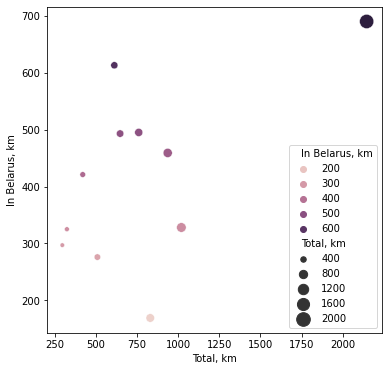

In [12]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(
    x = 'Total, km',
    y = 'In Belarus, km',
    data = df,
    hue = 'In Belarus, km',
    size = 'Total, km',
    sizes = (20, 200),
    legend = 'brief'
)
plt.show()

## Metoda prób i błędów.

   Metoda prób i błędów pozwala wyznaczyć przybliżony model liniowy. Nie jest on idealny, ponieważ jak widzimy błąd średniokwadratowy jest bardzo duży.

Błąd przybliżenia wynosi: 15382.814545454547


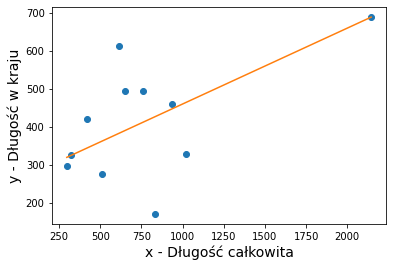

In [13]:
def model (parametry, x):
    a, b = parametry
    return a * x + b

# dobieramy liczby tak żeby 'pasowało'
a_est, b_est = 0.2, 260

# liczymy błąd
dataSize = X.size
error = 0
for i in range(0, dataSize):
    error = error + ( ( Y[i] - ( a_est * X[i] + b_est ) ) ) ** 2
    
print('Błąd przybliżenia wynosi: %s' % str(error / dataSize) )


X_test = np.linspace(start = X.min(), stop = X.max(), num = 300)
Y_pred = model(parametry = [a_est, b_est], x = X_test)

plt.scatter(X,Y)
plt.plot(X_test, Y_pred, color = 'tab:orange')
plt.xlabel('x - Długość całkowita', fontsize = 14)
plt.ylabel('y - Długość w kraju', fontsize = 14)
plt.show()

## Metoda analityczna
   Ta metoda jest skuteczniejsza, jednak nie aż tak jak metod biblioteczne języka python. Korzystam tutaj z metody najmniejszych kwadratów poznanej na wykładzie.

parametr a estymowany metodą najmniejszych kwadratów wynosi 0.00664366057133406
parametr b estymowany metodą najmniejszych kwadratów wynosi 415.09090909090907
Błąd przybliżenia wynosi: 21210.10159587438


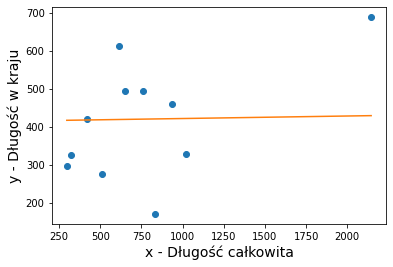

In [14]:
def model (parametry, x):
    a, b = parametry
    return a * x + b

xAvr = X.mean()
yAvr = Y.mean()
dataSize = X.size

a_est = 0
b_est = 0

# liczymy a
# licznik
up = 1
for i in range(0, dataSize):
    up = up + ( X[i] * Y[i] )
up = up - ( dataSize * xAvr * yAvr )

# mianownik
down = 1
for i in range(0, dataSize):
    down = down + X[i]
down = down ** 2 - ( dataSize * xAvr**2 )

# wynik
a_est = up / down
print('parametr a estymowany metodą najmniejszych kwadratów wynosi %s' % a_est)

# liczymy b
b_est = yAvr - ( b_est * xAvr )
print('parametr b estymowany metodą najmniejszych kwadratów wynosi %s' % b_est)

# liczymy błąd
error = 0
for i in range(0, dataSize):
    error = error + ( ( ( Y[i] - ( a_est * X[i] + b_est ) ) ) ** 2 )
    
print('Błąd przybliżenia wynosi: %s' % str(error / dataSize) )

X_test = np.linspace(start = X.min(), stop = X.max(), num = 300)
Y_pred = model(parametry = [a_est, b_est], x = X_test)

plt.scatter(X,Y)
plt.plot(X_test, Y_pred, color = 'tab:orange')
plt.xlabel('x - Długość całkowita', fontsize = 14)
plt.ylabel('y - Długość w kraju', fontsize = 14)
plt.show()


### TEGO NIE CZYTAĆ, NIEUDOLNE PRÓBY!

In [23]:
from numpy.linalg import det, inv, matrix_power

theta = np.dot(X.T, X) 

"""
Xhelp = df['Total, km']
Xhelp = df['Total, km'].values
Xhelp = Xhelp[0:9]

Xhelp = Xhelp.reshape(3,3)

print(Xhelp)

theta = np.dot(
    np.dot(
        matrix_power(np.dot(Xhelp, np.transpose(Xhelp)), -1),
        X
    ),
    np.transpose(Y)
)



"""

thetab

9215924

## Model i testy

   Budowa oraz ćwiczenie modelu wymagają utowrzenia dodatkowych zbiorów testowych. Musimy zatem podzielić nasz zbiór X na zbiór treningowy: X_train oraz zbiór testowy X_test. Analogicznie postępujemy dla zbioru Y.
   Mamy na wykresie narysowane dwa modele: liniowy oraz uogólniony liniowy. Ponadto zaznaczone jest które rzeki zostały wzięte do treningu a które do testów.

Parametry modelu liniowego: [0.20812], 202.2934
Błąd średniokwadratowy modelu liniowego: 4.05e+04

Parametry modelu GLM: [ 0.     -0.0355  0.0001], 307.73799
Błąd średniokwadratowy modelu GLM: 4.13e+04



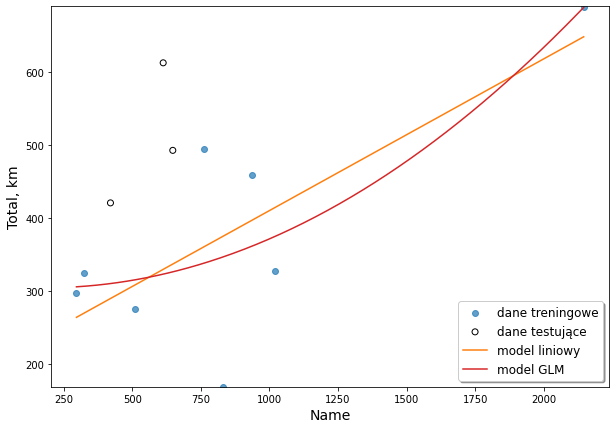

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df['Total, km'].values
Y = df['In Belarus, km'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)


# =========  Model liniowy =========
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_train.reshape(-1,1), Y_train)
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

# ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), 
              Y_train)
print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

# Predykcje wszystkich modeli dla całego zakreso osi X
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))

# Wizualizacja
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.xlabel(df.columns[0], fontsize=14)
plt.ylabel(df.columns[1], fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-0.1, Y.max()+0.5])
plt.show()

   Co by się stało gdybyśmy zwiększyli ilość danych do testów? Czy zmienił by się kształt któregoś z wykresów? Sprawdźmy to doświadczalnie: za pierwszym razem weźmy 20% danych do testów a za drugim 50%.

Parametry modelu liniowego: [0.1824], 244.88955
Błąd średniokwadratowy modelu liniowego: 2.27e+04

Parametry modelu GLM: [ 0.000e+00 -2.028e-01  2.000e-04], 414.08491
Błąd średniokwadratowy modelu GLM: 2.74e+04



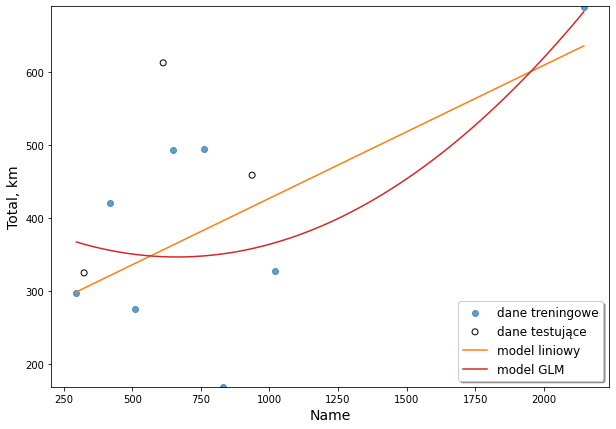

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df['Total, km'].values
Y = df['In Belarus, km'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


# =========  Model liniowy =========
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_train.reshape(-1,1), Y_train)
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

# ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), 
              Y_train)
print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

# Predykcje wszystkich modeli dla całego zakreso osi X
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))

# Wizualizacja
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.xlabel(df.columns[0], fontsize=14)
plt.ylabel(df.columns[1], fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-0.1, Y.max()+0.5])
plt.show()

Parametry modelu liniowego: [0.10371], 416.21239
Błąd średniokwadratowy modelu liniowego: 3.18e+04

Parametry modelu GLM: [ 0.0000e+00 -1.5776e+00  6.0000e-04], 1320.79825
Błąd średniokwadratowy modelu GLM: 1.69e+05



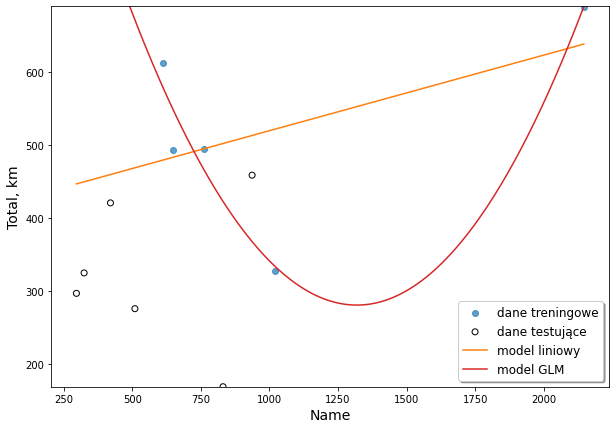

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df['Total, km'].values
Y = df['In Belarus, km'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)


# =========  Model liniowy =========
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_train.reshape(-1,1), Y_train)
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

# ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), 
              Y_train)
print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

# Predykcje wszystkich modeli dla całego zakreso osi X
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))

# Wizualizacja
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.xlabel(df.columns[0], fontsize=14)
plt.ylabel(df.columns[1], fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-0.1, Y.max()+0.5])
plt.show()